In [264]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
import cv2
import time

In [265]:
path = r'C:\Users\lmmwe\OneDrive\Desktop\Digital Image Processing Project\train'

In [266]:
n,m = 256,128

In [267]:
data = []
for img in os.listdir(path):
    img = cv2.imread(os.path.join(path,img))
    if img is not None:
       gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #gray image
       resize_img = cv2.resize(gray_img, (n,m)) #resize image, 256*128
       data.append(resize_img)

In [268]:
sym = {0:'5',1:'10', 2:'20', 3:'50', 4:'100'}

In [269]:
x = np.array(data)
x = x.reshape(x.shape[0],n*m)
x = x/255.0
y = np.array([[i]*130 for i in range(10)]).flatten()
x.shape, len(y)

((1300, 32768), 1300)

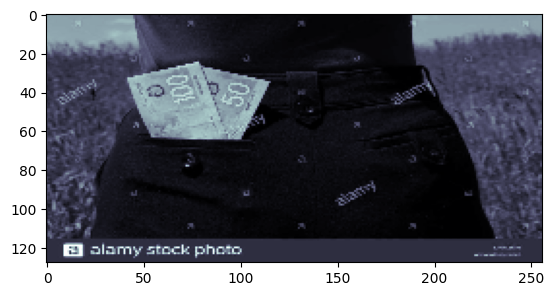

In [270]:
plt.imshow(x[10].reshape(m,n), cmap=plt.cm.bone)

In [271]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1040, 32768), (260, 32768), (1040,), (260,))

In [272]:
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
import tensorflow
tensorflow.random.set_seed(0)
from numpy.random import seed
seed(0)

In [273]:
y_train = to_categorical(y_train)
y_train.shape, x_train.shape

((1040, 10), (1040, 32768))

In [274]:
NN = models.Sequential()
NN.add(layers.Dense(1024, activation = 'tanh', input_shape = (x_train.shape[1],)))
NN.add(layers.Dense(512, activation = 'relu'))
NN.add(layers.Dense(256, activation = 'relu'))
NN.add(layers.Dense(10, activation = 'Softmax'))

In [275]:
NN.summary() 

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 1024)              33555456  
                                                                 
 dense_77 (Dense)            (None, 512)               524800    
                                                                 
 dense_78 (Dense)            (None, 256)               131328    
                                                                 
 dense_79 (Dense)            (None, 10)                2570      
                                                                 
Total params: 34214154 (130.52 MB)
Trainable params: 34214154 (130.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [276]:
NN.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [277]:
start = time.time()
NN.fit(x_train, y_train, epochs = 150, batch_size=32)
nn_time = time.time() - start

Epoch 1/150
33/33 [==============================] - 20s 475ms/step - loss: 2.9838 - accuracy: 0.1067
Epoch 2/150
33/33 [==============================] - 16s 480ms/step - loss: 2.3653 - accuracy: 0.1019
Epoch 3/150
33/33 [==============================] - 16s 471ms/step - loss: 2.3277 - accuracy: 0.0962
Epoch 4/150
33/33 [==============================] - 15s 469ms/step - loss: 2.3081 - accuracy: 0.0923
Epoch 5/150
33/33 [==============================] - 15s 467ms/step - loss: 2.3023 - accuracy: 0.1048
Epoch 6/150
33/33 [==============================] - 16s 472ms/step - loss: 2.3021 - accuracy: 0.0952
Epoch 7/150
33/33 [==============================] - 16s 472ms/step - loss: 2.3018 - accuracy: 0.1048
Epoch 8/150
33/33 [==============================] - 16s 471ms/step - loss: 2.3015 - accuracy: 0.0885
Epoch 9/150
33/33 [==============================] - 16s 470ms/step - loss: 2.3014 - accuracy: 0.1038
Epoch 10/150
33/33 [==============================] - 16s 473ms/step - loss: 2.301

In [278]:
pred_nn = NN.predict(x_val)

9/9 [==============================] - 1s 47ms/step


In [279]:
predict_nn = [np.argmax(pred_nn[i], axis = -1) for i in range(x_val.shape[0])]

In [280]:
actual = []
for i in y_val:
    if i < len(sym):
        actual.append(f' {sym[i]} CAD')
    else:
        actual.append('Unknown Symbol')

pred = []
for i in predict_nn:
    if i < len(sym):
        pred.append(f' {sym[i]} CAD')
    else:
        pred.append('Unknown Symbol')

In [281]:
pd.DataFrame(zip(actual, pred), columns= ['Actual', 'Predicted'])

,Actual,Predicted
0,100 CAD,20 CAD
1,Unknown Symbol,20 CAD
2,Unknown Symbol,20 CAD
3,50 CAD,20 CAD
4,10 CAD,20 CAD
...,...,...
255,Unknown Symbol,20 CAD
256,50 CAD,20 CAD
257,100 CAD,20 CAD
258,Unknown Symbol,20 CAD


In [282]:
from sklearn.metrics import confusion_matrix,classification_report

In [283]:
confusion_matrix(predict_nn, y_val)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [21, 25, 18, 38, 22, 24, 21, 39, 23, 29],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [284]:
print(classification_report(y_val, predict_nn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        25
           2       0.07      1.00      0.13        18
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00        24
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        29

    accuracy                           0.07       260
   macro avg       0.01      0.10      0.01       260
weighted avg       0.00      0.07      0.01       260



c:\Users\lmmwe\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lmmwe\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lmmwe\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [285]:
from tensorflow.keras.utils import to_categorical

In [286]:
y_val_one_hot = to_categorical(y_val, num_classes=10)

In [287]:
val_loss, val_acc = NN.evaluate(x_val, y_val_one_hot)
print(f'ACCURACY : {val_acc}, \nLOSS : {val_loss}')

9/9 [==============================] - 1s 41ms/step - loss: 2.3221 - accuracy: 0.0692
ACCURACY : 0.06923077255487442, 
LOSS : 2.322053909301758


In [288]:
from sklearn.decomposition import PCA

In [289]:
def evaluate( components, eigenValues, eigenVectors, df):
    weightage = {}
    col = ['PC' + str(1+1) for i in range(components.shape[1])]
    transform = pd.DataFrame(components, columns= col)

    var = eigenValues/sum(eigenValues)
    for i in range(1, len(var)+1):
        if sum(var[:i])>=0.9:
            no_of_pc = i
            break
    print(f'\n{no_of_pc} components explains 90% or more variability')

    for i in range(no_of_pc):
        top_n = np.argsort( abs( eigenVectors[i]) )[::-1][:4]
        weightage['PC' +str(i+1)] = [str(round(abs(eigenVectors[i][j]),4)) for j in top_n]

    impact = pd.DataFrame.from_dict(weightage, orient='index')
    impact[ 'Eigen Values'] = eigenValues[:no_of_pc]
    impact['Variability (%)'] = var[:no_of_pc]
    impact['Cummulative Variability (%)'] = [sum(var[:i]) for i in range(1, no_of_pc+1)]
    return transform, impact, no_of_pc

In [290]:
def PCA_lib(df):
    pca = PCA()
    pca.fit(df)
    eigenVectors = pca.components_.T
    eigenValues = pca.explained_variance_
    components = pca.transform(df)
    return pca, components, eigenValues, eigenVectors

In [291]:
pca, components, eigenValues, eigenVectors = PCA_lib(x)

In [292]:
x_pca, impact, no_of_pc = evaluate(components, eigenValues, eigenVectors, x)


278 components explains 90% or more variability


In [293]:
x.shape, x_pca.shape, y.shape


((1300, 32768), (1300, 1300), (1300,))

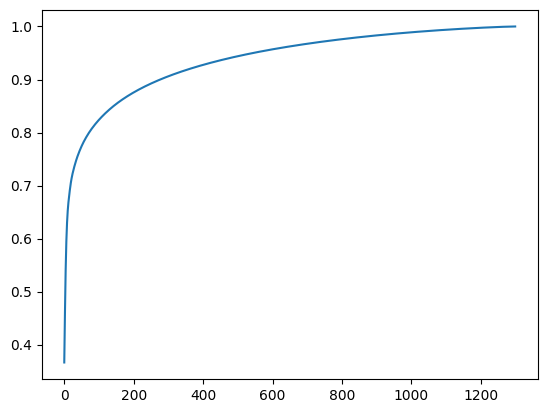

In [294]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

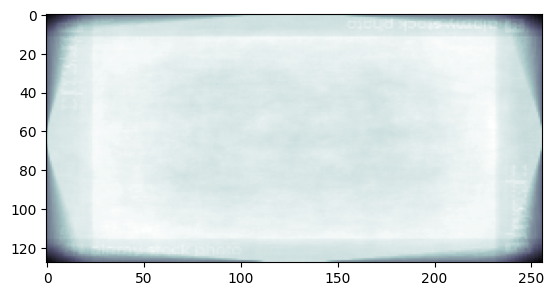

In [295]:
plt.imshow(pca.mean_.reshape(m,n),cmap=plt.cm.bone)

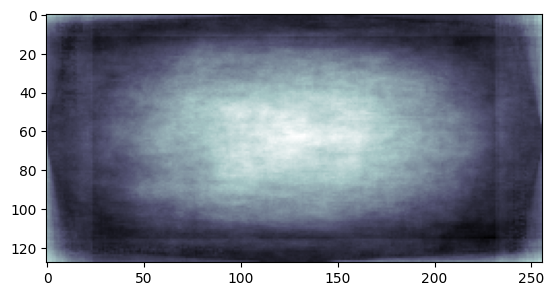

In [296]:
plt.imshow(eigenVectors.T[0].reshape(m,n),cmap=plt.cm.bone)

In [297]:
projected_train = pca.fit_transform(x)
projected_train.shape

(1300, 1300)

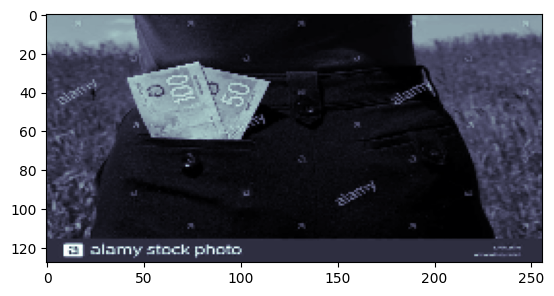

In [298]:
inv_proj = pca.inverse_transform(projected_train)
plt.imshow(inv_proj[10].reshape(m,n),cmap=plt.cm.bone)

In [299]:
x_pca_train, x_pca_val, y_train, y_val = train_test_split(x_pca, y, test_size=0.2, random_state=0)
x_pca_train.shape, x_pca_val.shape, y_train.shape, y_val.shape

((1040, 1300), (260, 1300), (1040,), (260,))

In [300]:
y_train = to_categorical(y_train)
y_train.shape, x_pca_train.shape

((1040, 10), (1040, 1300))

In [301]:
NN_pca = models.Sequential()
input_shape = x_pca_train.shape[1]
NN_pca.add(layers.Dense(1024, activation='tanh', input_shape=(input_shape,)))

NN_pca.add(layers.Dense(512, activation = 'relu'))
NN_pca.add(layers.Dense(256, activation = 'relu'))
NN_pca.add(layers.Dense(10, activation = 'Softmax'))

In [302]:

NN_pca.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 1024)              1332224   
                                                                 
 dense_81 (Dense)            (None, 512)               524800    
                                                                 
 dense_82 (Dense)            (None, 256)               131328    
                                                                 
 dense_83 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1990922 (7.59 MB)
Trainable params: 1990922 (7.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [303]:
NN_pca.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [304]:
start = time.time()
NN_pca.fit(x_pca_train, y_train, epochs = 150, batch_size=15)
nn_pca_time = time.time()-start

Epoch 1/150
70/70 [==============================] - 3s 21ms/step - loss: 2.4549 - accuracy: 0.1683
Epoch 2/150
70/70 [==============================] - 2s 21ms/step - loss: 1.0447 - accuracy: 0.6712
Epoch 3/150
70/70 [==============================] - 2s 23ms/step - loss: 0.2271 - accuracy: 0.9413
Epoch 4/150
70/70 [==============================] - 1s 21ms/step - loss: 0.0836 - accuracy: 0.9798
Epoch 5/150
70/70 [==============================] - 2s 29ms/step - loss: 0.1031 - accuracy: 0.9788
Epoch 6/150
70/70 [==============================] - 2s 24ms/step - loss: 0.0513 - accuracy: 0.9885
Epoch 7/150
70/70 [==============================] - 2s 22ms/step - loss: 0.0457 - accuracy: 0.9856
Epoch 8/150
70/70 [==============================] - 2s 29ms/step - loss: 0.0553 - accuracy: 0.9837
Epoch 9/150
70/70 [==============================] - 2s 26ms/step - loss: 0.0344 - accuracy: 0.9865
Epoch 10/150
70/70 [==============================] - 3s 37ms/step - loss: 0.0549 - accuracy: 0.9856

In [305]:
pred_nn_pca = NN_pca.predict(x_pca_val)

9/9 [==============================] - 0s 6ms/step


In [306]:
predict_nn_pca = [np.argmax(pred_nn_pca[i], axis = -1) for i in range(x_pca_val.shape[0])]

In [307]:
actual_pca = []
for i in y_val:
    if i < len(sym):
        actual_pca.append(f'{sym[i]} CAD')
    else:
        actual_pca.append('Unknown Symbol')
    
pred_pca = []
for i in predict_nn_pca:
    if i < len(sym):
        pred_pca.append(f'{sym[i]} CAD')
    else:
        pred_pca.append('Unknown Symbol')

In [308]:
pd.DataFrame(zip(actual_pca, pred_pca), columns = ['Actual', 'Predicted'])

,Actual,Predicted
0,100 CAD,Unknown Symbol
1,Unknown Symbol,Unknown Symbol
2,Unknown Symbol,100 CAD
3,50 CAD,Unknown Symbol
4,10 CAD,20 CAD
...,...,...
255,Unknown Symbol,10 CAD
256,50 CAD,100 CAD
257,100 CAD,5 CAD
258,Unknown Symbol,50 CAD


In [309]:
confusion_matrix(predict_nn_pca, y_val)

array([[3, 3, 1, 3, 1, 3, 2, 1, 1, 1],
       [2, 8, 3, 4, 4, 2, 0, 6, 0, 3],
       [4, 7, 3, 4, 2, 2, 2, 4, 3, 3],
       [0, 1, 3, 6, 2, 1, 3, 1, 1, 2],
       [1, 0, 2, 8, 4, 5, 2, 2, 2, 4],
       [3, 2, 2, 3, 1, 1, 0, 4, 1, 1],
       [5, 0, 1, 4, 4, 7, 8, 8, 6, 1],
       [0, 1, 0, 3, 1, 1, 0, 5, 2, 1],
       [0, 2, 1, 1, 2, 2, 2, 6, 5, 5],
       [3, 1, 2, 2, 1, 0, 2, 2, 2, 8]], dtype=int64)

In [310]:
print(classification_report(y_val, predict_nn_pca))

              precision    recall  f1-score   support

           0       0.16      0.14      0.15        21
           1       0.25      0.32      0.28        25
           2       0.09      0.17      0.12        18
           3       0.30      0.16      0.21        38
           4       0.13      0.18      0.15        22
           5       0.06      0.04      0.05        24
           6       0.18      0.38      0.25        21
           7       0.36      0.13      0.19        39
           8       0.19      0.22      0.20        23
           9       0.35      0.28      0.31        29

    accuracy                           0.20       260
   macro avg       0.21      0.20      0.19       260
weighted avg       0.23      0.20      0.20       260



In [311]:
from tensorflow.keras.utils import to_categorical

In [312]:
y_val_one_hot = to_categorical(y_val, num_classes=10)
y_val_one_hot = y_val_one_hot.reshape(-1, 10)

In [313]:
val_loss_pca, val_acc_pca = NN_pca.evaluate(x_pca_val, y_val_one_hot)
print(f'ACCURACY : {val_acc_pca}, \nLOSS : {val_loss_pca}')

9/9 [==============================] - 0s 5ms/step - loss: 18.7662 - accuracy: 0.1962
ACCURACY : 0.19615384936332703, 
LOSS : 18.766233444213867


In [314]:
nn_time = str(round(nn_time,2)) + ' sec'
nn_pca_time = str(round(nn_pca_time,2)) + ' sec'

In [315]:
pd.DataFrame([[val_acc, val_loss, nn_time],[val_acc_pca, val_loss_pca, nn_pca_time]], columns = ['Accuracy', 'Loss', 'Time Taken'], index = ['Without PCA', 'With PCA'])

,Accuracy,Loss,Time Taken
Without PCA,0.069231,2.322054,2262.15 sec
With PCA,0.196154,18.766233,211.84 sec


In [340]:
path = r'C:\Users\lmmwe\OneDrive\Desktop\Digital Image Processing Project\valid'

In [341]:
test_data = []
for img in os.listdir(path):
    img = cv2.imread(os.path.join(path,img))
    if img is not None:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resize_img = cv2.resize(gray_img, (n,m))
        test_data.append(resize_img)

In [342]:
x_test = np.array(test_data)
x_test = x_test.reshape(x_test.shape[0],n*m)
x_test = x_test/255.0
y_valid = [1,0,3,2,5,4,7,6,8,9]
x_test.shape, len(y_test)

((200, 32768), 10)

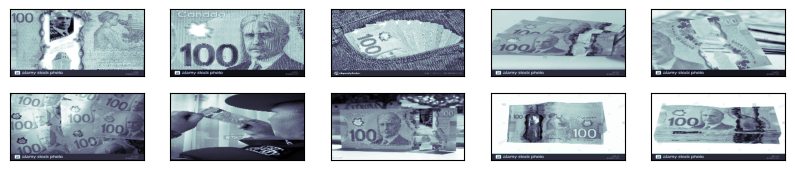

In [343]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,2))

for i in range(min(10, x_test.shape[0])):
    ax = fig.add_subplot(2,5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(m,n), cmap=plt.cm.bone)

In [344]:
x_test_pca = pca.transform(x_test)
x_test_pca.shape

(200, 1300)

In [345]:
pred_test = NN_pca.predict(x_test_pca)

7/7 [==============================] - 0s 6ms/step


In [346]:
predict_test = [np.argmax(pred_test[i], axis = -1) for i in range(x_test_pca.shape[0])]

In [349]:
actual_test = []
for i in y_test:
    if i < len(sym):
        actual_test.append(f'{sym[i]} CAD')
    else:
        actual_test.append('Unknown Symbol')
pred_test = []
for i in predict_test:
    if i < len(sym):
        pred_test.append(f'{sym[i]} CAD')
    else:
        pred_test.append('Unknown Symbol')

In [350]:
pd.DataFrame(zip(actual_test, pred_test), columns = ['Actual', 'Predicted'])

,Actual,Predicted
0,10 CAD,5 CAD
1,5 CAD,5 CAD
2,50 CAD,50 CAD
3,20 CAD,5 CAD
4,Unknown Symbol,5 CAD
5,100 CAD,5 CAD
6,Unknown Symbol,10 CAD
7,Unknown Symbol,100 CAD
8,Unknown Symbol,5 CAD
9,Unknown Symbol,5 CAD


In [351]:
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

In [352]:
# Check the number of samples in x_test_pca and y_test_encoded
print("Number of samples in x_test_pca:", x_test_pca.shape[0])
print("Number of samples in y_test_encoded:", y_test_encoded.shape[0])

# Ensure that both arrays have the same number of samples
min_samples = min(x_test_pca.shape[0], y_test_encoded.shape[0])
x_test_pca = x_test_pca[:min_samples]
y_test_encoded = y_test_encoded[:min_samples]


Number of samples in x_test_pca: 200
Number of samples in y_test_encoded: 10


In [353]:
# Evaluate the model on the test data
test_loss, test_acc = NN_pca.evaluate(x_test_pca, y_test_encoded)
print(f'ACCURACY : {test_acc}, \nLOSS : {test_loss}')

1/1 [==============================] - 0s 37ms/step - loss: 38.1039 - accuracy: 0.2000
ACCURACY : 0.20000000298023224, 
LOSS : 38.103878021240234
